<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial4.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial4.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 4: Arithmetic and Aggregation Methods

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/neuromatch/climate-course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

As we just learned in the video, alongside the latitudinal temperature gradients set by solar radiation, the large-scale ocean circulation patterns are one of the main controls on global sea surface temperature (SST, or tos). The surface currents distort this meridional gradient and can transport heat globally. In this tutorial, we'll use a series of tools in Xarray to interpret sea surface temperature data.

Specifically, we’ll import monthly SST data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model. A climate model is a mathematical representation of Earth's climate system components and their interactions. Climate models are based on well-documented physical processes to simulate the transfer of energy and materials through the climate system. You'll learn more about climate models later this week and next week, but for now, we're going to be working with SST data produced from a climate model.

To assess global variations in this SST dataset, we will practice using multiple attributes of Xarray:


*   Arithmetic methods to convert temperatures from Celsius to Kelvin
*   Aggregation methods to calculate mean, median, minimum, and maximum values of the data.


Finally, we'll create a map of global mean annual SST to visualize spatial variations in SST.


# Setup


In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )
!pip install pythia_datasets cftime nc-time-axis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.9 MB/s eta 0:00:00


In [2]:
# imports
import xarray as xr
from pythia_datasets import DATASETS
import matplotlib.pyplot as plt

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D1_T4"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [5]:
# @title Video 1: Oceanic Climate Systems

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'E3UEWlak5Zs'), ('Bilibili', 'BV1gz4y177vk')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Oceanic_Climate_Systems_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "hmqfr"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/hmqfr/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Oceanic_Climate_Systems_Slides")

# Section 1: Arithmetic Operations

Arithmetic operations with a single `DataArray` automatically apply over all array values (like NumPy). This process is called **vectorization**.  First, let's open the monthly sea surface temperature (SST) data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model.

In [9]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:204: SerializationWarning: variable 'tos' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

And look at the temperature variable `tos`.

In [10]:
ds.tos

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
[11664000 values with dtype=float32]
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Note in the attributes that the units are `degC`. One arithmetic operation we can do is to convert the temperature from degrees Celsius to Kelvin:

In [11]:
ds.tos + 273.15

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.3552 , 271.3553 , 271.3554 , ..., 271.35495, 271.355  ,
         271.3551 ],
        [271.36005, 271.36014, 271.36023, ..., 271.35986, 271.35992,
         271.36   ],
        [271.36447, 271.36453, 271.3646 , ..., 271.3643 , 271.36435,
         271.3644 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [271.40677, 271.40674, 271.4067 , ..., 271.40695, 271.4069 ,
         271.40683],
        [271.41296, 271.41293, 271.41293, ..., 271.41306, 271.413  ,
         271.41296],
        [271.41772, 271.41772, 271.41772, ..., 271.41766, 271.4177 ,
         271.4177 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.39386, 271.39383, 271.3938 , ..., 271.39407, 271.394  ,
         271.39392],
        [271.39935, 271.39932, 271.39932, ..., 271.39948, 271.39944,
         271.39938],
        [271.40372, 271.40372, 271.40375, ..., 271.4037 , 271.4037 ,
         271.40372]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5


You may notice that there are a lot of NaN values in the DataArray for `tos`. NaN isn’t a bad thing and it just means there isn’t data for those coordinates. In this case, there's no `tos` data for areas with land since this dataset only contains SST values.


Just to practice another arithmetic operation, let's square all values in `tos`:

In [12]:
ds.tos**2

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)> Size: 47MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.2213385, 3.2209656, 3.220537 , ..., 3.2221622, 3.221913 ,
         3.2216525],
        [3.203904 , 3.203617 , 3.2032912, ..., 3.2045207, 3.2043478,
         3.2041442],
        [3.1881146, 3.1879027, 3.1876712, ..., 3.188714 , 3.1885312,
         3.1883302]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [3.0388296, 3.0389647, 3.0390673, ..., 3.038165 , 3.0383828,
         3.0386322],
        [3.0173173, 3.0173445, 3.0173297, ..., 3.0169601, 3.0171173,
         3.0172386],
        [3.000791 , 3.0007784, 3.0007539, ..., 3.000933 , 3.000896 ,
         3.0008452]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.0839543, 3.0841148, 3.0842566, ..., 3.0832636, 3.0834875,
         3.0837412],
        [3.064733 , 3.0648024, 3.0648358, ..., 3.0642793, 3.0644639,
         3.0646174],
        [3.0494578, 3.0494475, 3.0494263, ..., 3.049596 , 3.0495603,
         3.0495107]]], dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

# Section 2: Aggregation Methods

A very common step during data analysis is to summarize the data in question by computing aggregations like `.sum()`, `.mean()`, `.median()`, `.min()`, `.max()` in which reduced data provide insight into the nature of the large dataset. For example, in the introductory video for this tutorial, we saw maps of the mean annual sea surface temperature and sea surface density.


The following table summarizes some other built-in Xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``.count()``              | Total number of items           |
| ``.mean()``, ``.median()`` | Mean and median                 |
| ``.min()``, ``.max()``     | Minimum and maximum             |
| ``.std()``, ``.var()``     | Standard deviation and variance |
| ``.prod()``               | Compute product of elements            |
| ``.sum()``                | Compute sum of elements                |
| ``.argmin()``, ``.argmax()``| Find index of minimum and maximum value |


Let's explore some of these aggregation methods.


Compute the temporal minimum:

In [13]:
ds.tos.min(dim="time")

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.8083605, -1.8083031, -1.8082187, ..., -1.8083988, -1.8083944,
        -1.8083915],
       [-1.8025414, -1.8024837, -1.8024155, ..., -1.8026428, -1.8026177,
        -1.8025846],
       [-1.7984415, -1.7983989, -1.7983514, ..., -1.7985678, -1.7985296,
        -1.7984871]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

Compute the spatial sum:

In [14]:
ds.tos.sum(dim=["lat", "lon"])

<xarray.DataArray 'tos' (time: 180)> Size: 720B
array([603767.  , 607702.5 , 603976.5 , 599373.56, 595119.94, 595716.75,
       598177.3 , 600670.6 , 597825.56, 591869.  , 590507.7 , 597189.2 ,
       605954.06, 609151.  , 606868.9 , 602329.9 , 599465.75, 601205.5 ,
       605144.4 , 608588.5 , 604046.9 , 598927.75, 597519.75, 603876.9 ,
       612424.44, 615765.2 , 612615.44, 606310.6 , 602034.4 , 600784.9 ,
       602013.5 , 603142.2 , 598850.9 , 591917.44, 589234.56, 596162.5 ,
       602942.06, 607196.9 , 604928.2 , 601735.6 , 599011.8 , 599490.9 ,
       600801.44, 602786.94, 598867.2 , 594081.8 , 593736.25, 598995.6 ,
       607285.25, 611901.06, 609562.75, 603527.3 , 600215.4 , 601372.6 ,
       604144.5 , 605376.75, 601256.2 , 595245.2 , 594002.06, 600490.4 ,
       611878.6 , 616563.  , 613050.8 , 605734.  , 600808.75, 600898.06,
       603930.56, 605644.7 , 599917.5 , 592048.06, 590082.8 , 596950.7 ,
       607701.94, 610844.7 , 609509.6 , 603380.94, 599838.1 , 600334.25,
       604386.6 , 607848.1 , 602155.2 , 594949.06, 593815.06, 598365.3 ,
       608730.8 , 612056.5 , 609922.5 , 603077.1 , 600134.1 , 602821.2 ,
       606152.75, 610257.8 , 604685.8 , 596858.  , 592894.8 , 599944.9 ,
       609764.44, 614610.75, 611434.75, 605606.4 , 603790.94, 605750.2 ,
       609250.06, 612935.7 , 609645.06, 601706.4 , 598896.5 , 605349.75,
       614671.8 , 618686.7 , 615895.2 , 609438.2 , 605399.56, 606126.75,
       607942.3 , 609680.4 , 604814.25, 595841.94, 591908.44, 595638.7 ,
       604798.94, 611327.1 , 609765.7 , 603727.56, 600970.  , 602514.  ,
       606303.7 , 609225.25, 603724.3 , 595944.8 , 594477.4 , 597807.4 ,
       607379.06, 611808.56, 610112.94, 607196.3 , 604733.06, 605488.25,
       610048.3 , 612655.75, 608906.25, 602349.7 , 601754.2 , 609220.4 ,
       619367.1 , 623783.2 , 619949.7 , 613369.06, 610190.8 , 611091.2 ,
       614213.44, 615665.06, 611722.2 , 606259.56, 605970.2 , 611463.3 ,
       619794.6 , 626036.5 , 623085.44, 616295.9 , 611886.3 , 611881.9 ,
       614420.75, 616853.56, 610375.44, 603471.5 , 602108.25, 608094.3 ,
       617450.7 , 623508.7 , 619830.2 , 612033.3 , 608737.2 , 610105.25,
       613692.7 , 616360.44, 611735.4 , 606512.7 , 604249.44, 608777.44],
      dtype=float32)
Coordinates:
  * time     (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

Compute the temporal median:

In [15]:
ds.tos.median(dim="time")

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7648907, -1.7648032, -1.7647004, ..., -1.7650614, -1.7650102,
        -1.7649589],
       [-1.7590305, -1.7589546, -1.7588665, ..., -1.7591925, -1.7591486,
        -1.759095 ],
       [-1.7536805, -1.753602 , -1.7535168, ..., -1.753901 , -1.753833 ,
        -1.7537591]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

Compute the mean SST:

In [16]:
ds.tos.mean()

<xarray.DataArray 'tos' ()> Size: 8B
array(14.48397064)

Because we specified no `dim` argument, the function was applied over all dimensions, computing the mean of every element of `tos` across time and space. It is possible to specify a dimension along which to compute an aggregation. For example, to calculate the mean in time for all locations (i.e. the global mean annual SST), specify the time dimension as the dimension along which the mean should be calculated:

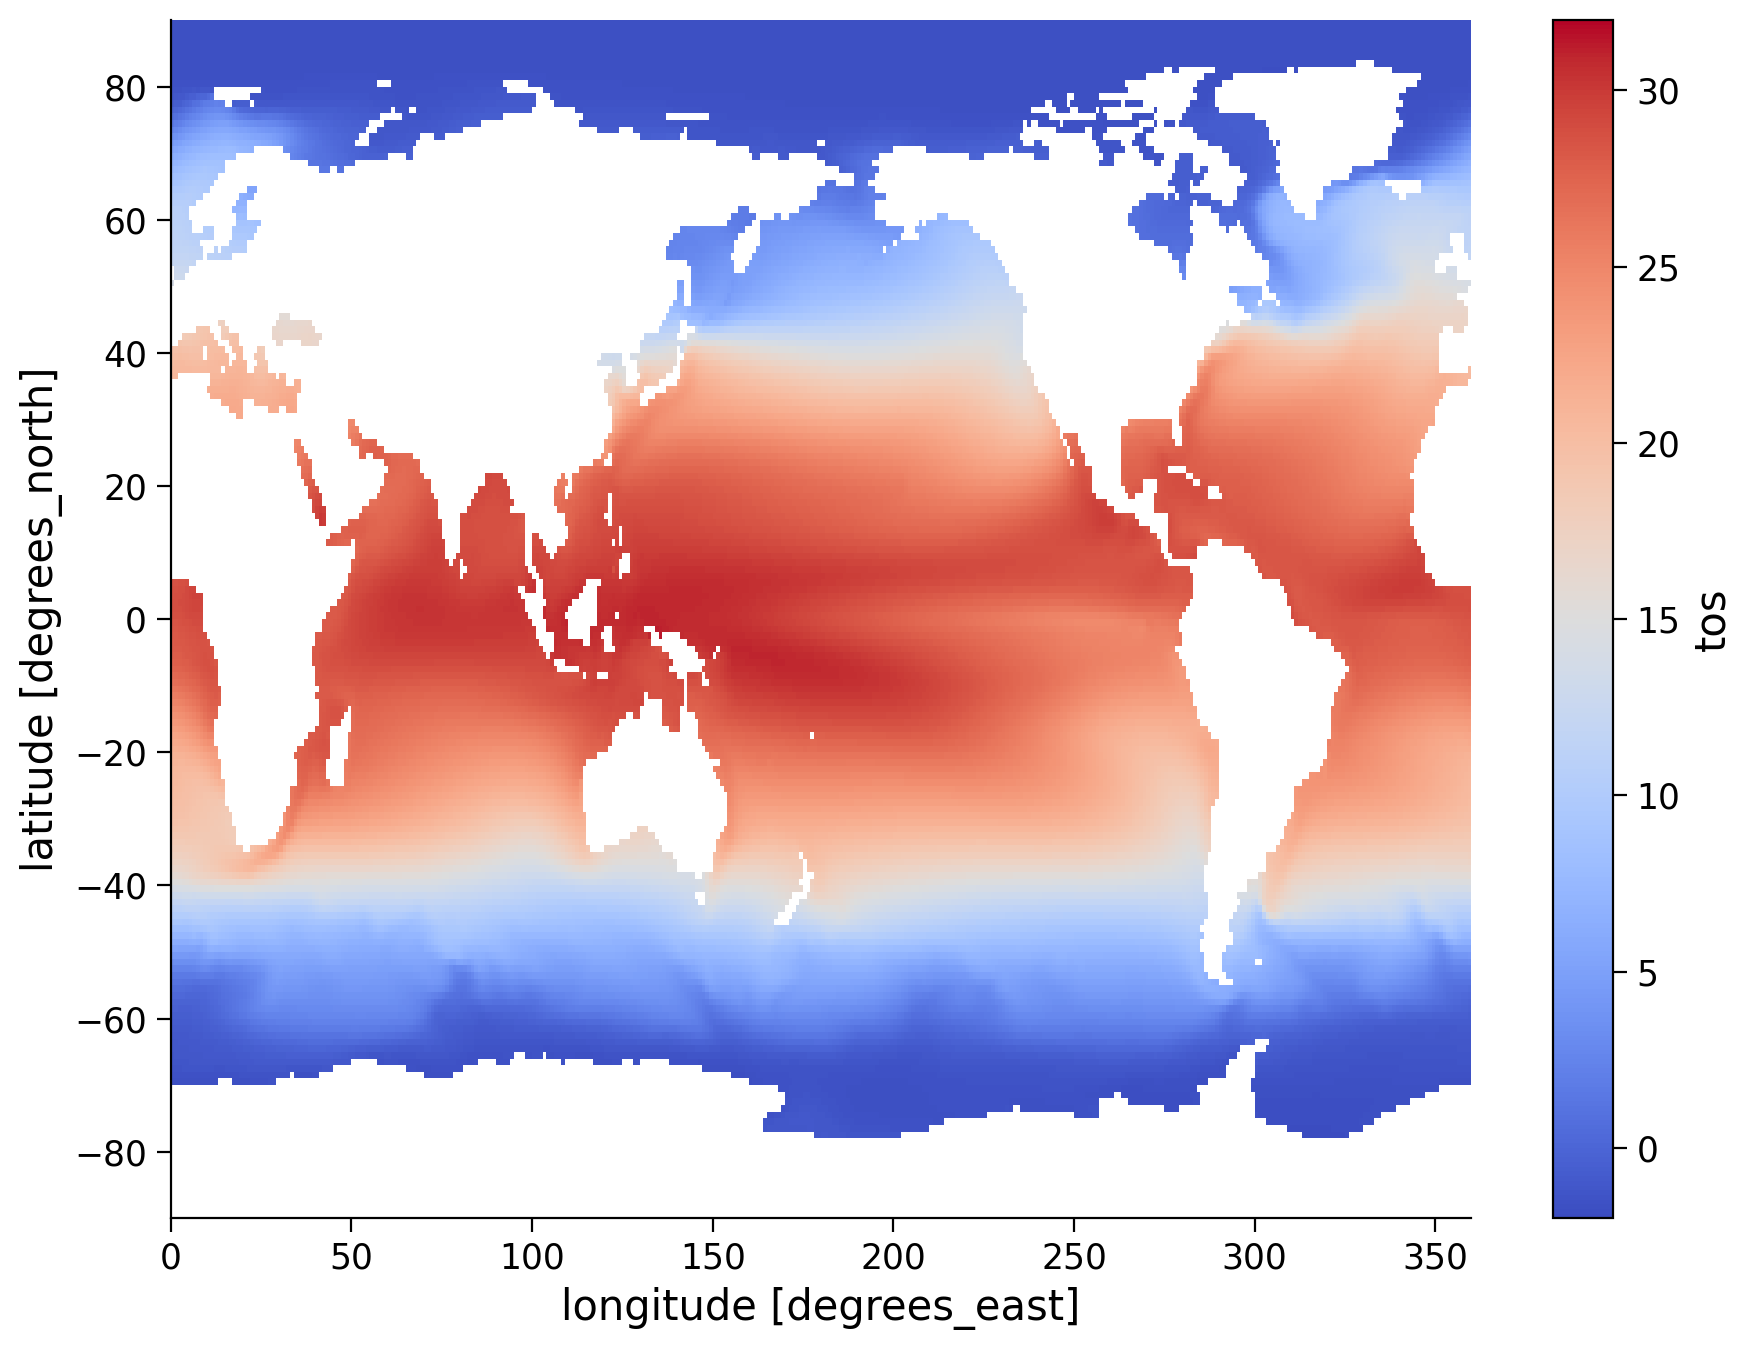

In [17]:
# Note how we chain the mean() and plot() methods, which get executed from left to right
ds.tos.mean(dim="time").plot(size=7, vmin=-2, vmax=32, cmap="coolwarm")

### Questions 2: Climate Connection

Observe the spatial patterns in SST and consider the following in the context of the components of the ocean climate system we learned about in the video:

1. Recall that upwelling commonly occurs off the west coast of continents, for example, in the eastern tropical Pacific off the west coast of South America. Do you see evidence for upwelling in this region? How do you think the mean SST in this region would change if you looked at a specific season rather than the annual mean? Would upwelling be more or less evident?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial4_Solution_c61cf4b9.py)



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2")

# Summary

In this tutorial, we have explored the use of the CESM2 and have imported and analyzed monthly sea surface temperature (SST, or tos) data. We used arithmetic methods to convert SST from Celsius to Kelvin, and aggregation methods such as the mean, median, minimum, and maximum values of the data. To conclude, we visualized the spatial variations in SST by generating a map of the global mean annual SST. This tutorial has provided us with valuable insights into global variations in SST and how to manipulate and analyze such data using Xarray.


# Resources

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).